In [54]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import tqdm
import scipy.integrate as integrate
from sklearn.utils import shuffle

In [55]:
#posizione
N = 10000        #number of particles

b = 1         #scale radius
Pr=np.random.uniform(0, 1, N)
#r=np.sqrt((Pr**(2/3)*b**2)/(1-Pr**(2/3)))
r = np.sqrt((Pr**(2/3) * b**2)/(1 - Pr**(2/3)))
#r = b * (Pr**(-2/3) - 1)**(-1/2)

phi = np.random.uniform(0, 2*np.pi, N)

Pt = np.random.uniform(0, 1, N)
theta = np.arccos(1-2*Pt)


x=[]
y=[]
z=[]

x = r * np.cos(phi) * np.sin(theta)
y = r * np.sin(phi) * np.sin(theta)
z = r * np.cos(theta) 




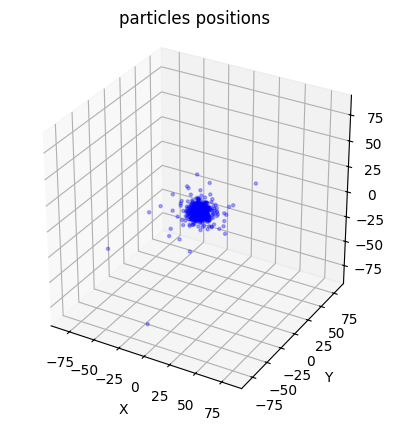

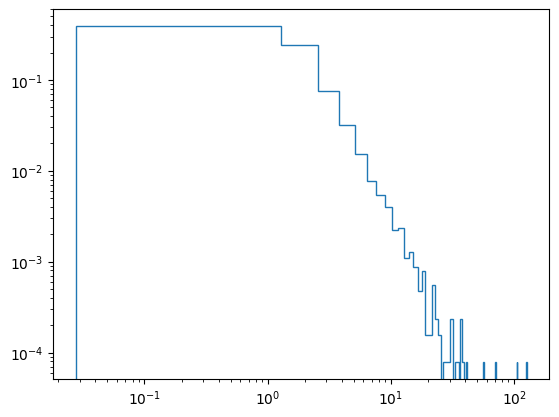

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])
ax.scatter(x, y, z, c='b', marker='.', alpha=0.3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-90, 90)
ax.set_ylim(-90, 90)
ax.set_zlim(-90, 90)


plt.title('particles positions')
plt.show()
plt.loglog()
plt.hist(r, bins=100, histtype="step", density=True);       #max at b (=1)

1.0057142857142858


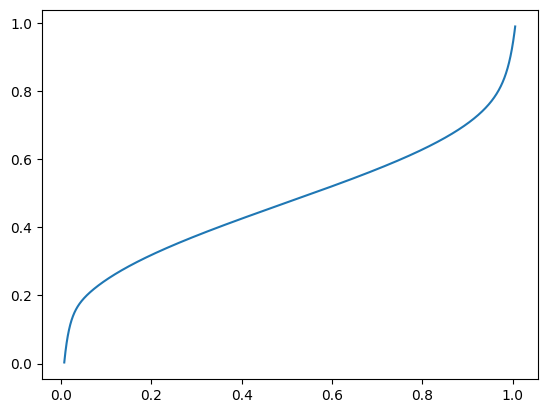

In [57]:
#velocità
q = np.genfromtxt("x(t).txt", usecols=1, skip_header=700, skip_footer=800)      #skip rows to get only values from 0 to 1
g = np.genfromtxt("x(t).txt", usecols=0, skip_header=700, skip_footer=800)/0.0434      #g(q)

print(np.max(g))        #should be 1 with normalization

plt.plot(g, q)

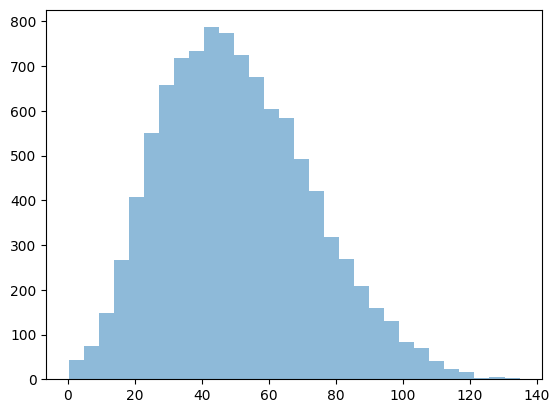

In [58]:
#---------------------METHOD 1-----------------------
qdist =  np.random.choice(q, N)
#plt.hist(qdist)
vphi = 2 * np.pi * np.random.uniform(0, 1, N)
vtheta = np.arccos(1 - 2 * np.random.uniform(0, 1, N))

vel = qdist*np.sqrt(2*N)*(r**2+b**2)**-0.25
vx = vel*np.sin(vtheta)*np.cos(vphi)
vy = vel*np.sin(vtheta)*np.sin(vphi)
vz = vel*np.cos(vtheta)

plt.hist(vel, bins=30, alpha=0.5);

In [59]:
m_pert = np.sqrt(N)
x_pert = 50*b
y_pert = b
z_pert = 0
vx_pert = - (np.mean(vel) + 3*np.std(vel))
vy_pert = 0
vz_pert = 0

In [60]:
num_dimensions = 3
starting_time = 0
m = np.ones(N)
with open("Treecode_perturber.txt", "w") as f:     
    print(N+1, num_dimensions, starting_time, sep="\n", file=f)
    np.savetxt(f, np.column_stack([m]))  #x, y, z, vx, vy, vz]), delimiter=" ")
    np.savetxt(f, [m_pert])
    np.savetxt(f, np.column_stack([x, y, z]), delimiter=" ")
    np.savetxt(f, np.column_stack([x_pert, y_pert, z_pert]), delimiter = " ")
    np.savetxt(f, np.column_stack([vx, vy, vz]), delimiter=" ")
    np.savetxt(f, np.column_stack([vx_pert, vy_pert, vz_pert]), delimiter = " ")

dyn_time = np.pi*np.sqrt(((2*b)**3) / (8*N))
print(dyn_time)
print(vx_pert)

0.031415926535897934
-117.7288279288713
